<a href="https://colab.research.google.com/github/bountyhunter12/ML/blob/main/polyReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [257]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [258]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.rand(200, 1)

# y = 0.8x^2 + 0.9x + 2

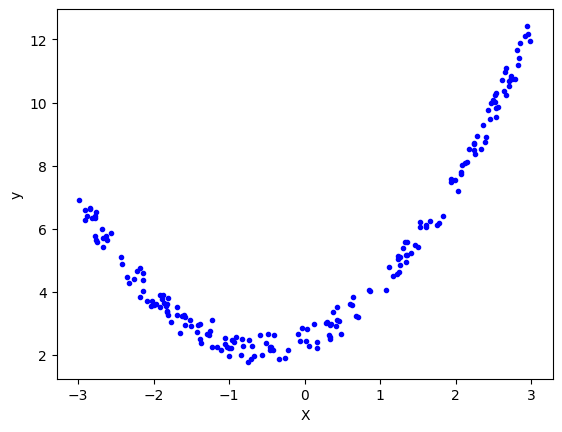

In [259]:
plt.plot(X,y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [260]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [261]:
lr = LinearRegression()
lr.fit(X_train,y_train)


LinearRegression()

In [262]:
lr.coef_

array([[0.98156796]])

In [263]:
lr.intercept_

array([5.28665354])

In [264]:
y_pre = lr.predict(X_test)
r2_score(y_test,y_pre)

0.509892002544083

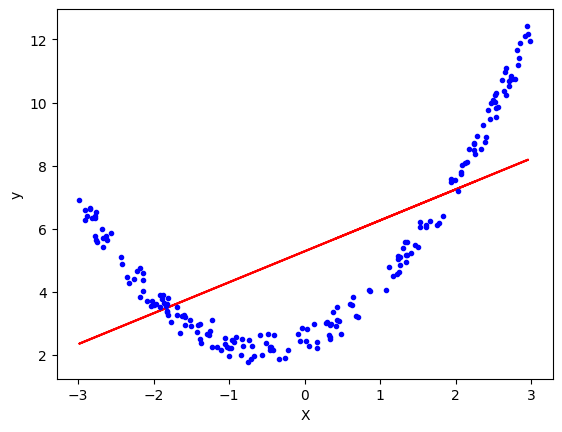

In [265]:
plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X,y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [266]:
# Polynomial Linear Regression

poly = PolynomialFeatures(degree=2,include_bias=True)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [267]:
print(X_train[0])
print(X_train_trans[0])

[0.40954178]
[1.         0.40954178 0.16772447]


In [268]:
lr = LinearRegression()
lr.fit(X_train_trans,y_train)

LinearRegression()

In [269]:
y_pre = lr.predict(X_test_trans)
r2_score(y_test,y_pre)

0.989652240230527

In [270]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.9264904  0.80265759]]
[2.49161944]


In [271]:
X_new = np.linspace(-3, 3, 200).reshape(200,1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

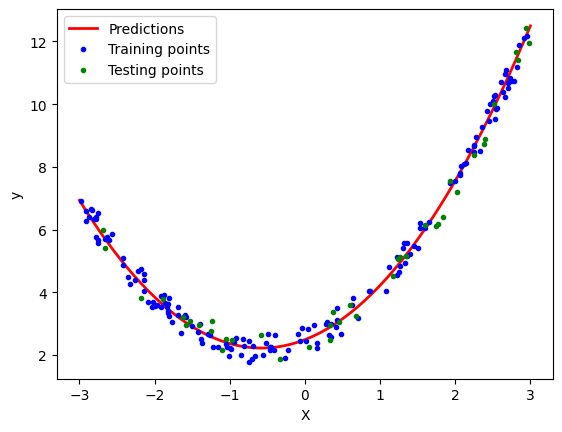

In [272]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.", label='Training points')
plt.plot(X_test, y_test, "g.", label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [273]:
def ploynomial_regression(degree):
  X_new = np.linspace(-3, 3, 100).reshape(100,1)
  X_new_poly = poly.transform(X_new)

  poly_f = PolynomialFeatures(degree=degree,include_bias=True)
  std_scaler = StandardScaler()
  lin_reg = LinearRegression()
  poly_reg = Pipeline([
      ("poly_features",poly_f),
      ("std_scaler",std_scaler),
      ("lin_reg",lin_reg),
  ])
  poly_reg.fit(X,y)
  y_new = poly_reg.predict(X_new)
  plt.plot(X_new, y_new,'r', label='Degree' +  str(degree), linewidth=2)
  plt.plot(X_train, y_train, "b.", linewidth=3)
  plt.plot(X_test, y_test, "g.", linewidth=3)
  plt.xlabel("X")
  plt.ylabel("y")
  plt.legend()
  plt.axis([-3,3,0,10])
  plt.show()


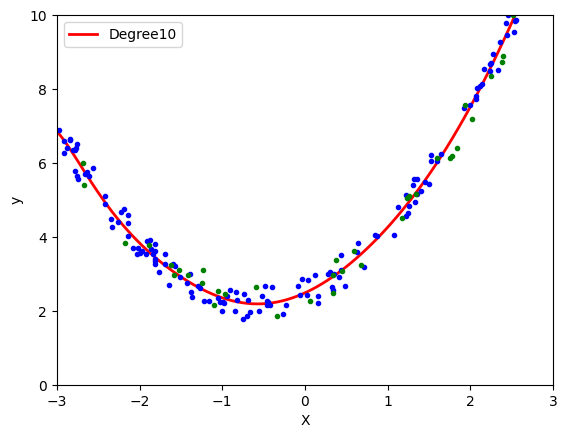

In [274]:
ploynomial_regression(10)

In [275]:
poly.powers_

array([[0],
       [1],
       [2]])

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



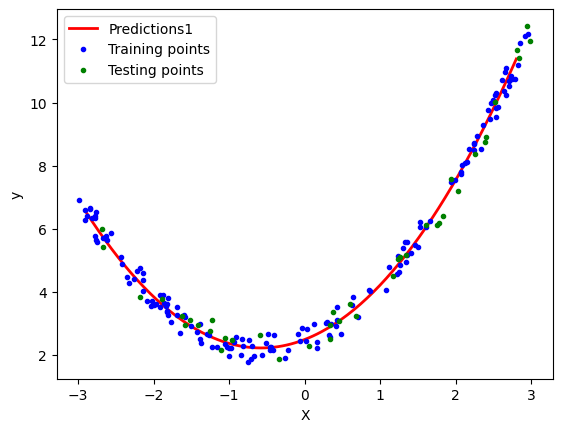

In [276]:
poly = PolynomialFeatures(degree=2)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

sgd = SGDRegressor(max_iter=100)
sgd.fit(X_train_trans,y_train)


X_new = np.linspace(-2.9, 2.8, 200).reshape(200,1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

y_pre = sgd.predict(X_test_trans)

plt.plot(X_new, y_new,'r-', label='Predictions' +  str(round(r2_score(y_test,y_pre))), linewidth=2)
plt.plot(X_train, y_train, "b.", label='Training points')
plt.plot(X_test, y_test, "g.", label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


In [277]:
x = 7 * np.random.rand(100,1) - 2.8
y = 7 * np.random.rand(100,1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y + 2
# z = x^2 + y^2 + 0.2x + 0.2y + 0.1xy + 2

In [278]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x = x.ravel(), y = y.ravel(), z = z.ravel())
fig.show()

In [279]:
lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input,y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)

In [280]:
import plotly.graph_objects as go

fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final ))

fig.show()

In [281]:
X_multi = np.array([x,y]).reshape(100,2)
X_multi.shape

(100, 2)

In [282]:
poly = PolynomialFeatures(degree=3)
X_multi_trans = poly.fit_transform(X_multi)

In [283]:
print("Ouput",poly.n_output_features_)
print("Powers\n",poly.powers_)

Ouput 10
Powers
 [[0 0]
 [1 0]
 [0 1]
 [2 0]
 [1 1]
 [0 2]
 [3 0]
 [2 1]
 [1 2]
 [0 3]]


In [284]:
X_multi_trans.shape

(100, 10)

In [285]:
lr = LinearRegression()
lr.fit(X_multi_trans, z)

LinearRegression()

In [286]:
X_test_multi = poly.transform(final)

In [287]:
z_final = lr.predict(X_multi_trans).reshape(10,10)

In [288]:

fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final))

fig.update_layout(scene = dict(zaxis = dict(range=[0,35])))

fig.show()